# Object Detection 실습

AI기활 TA 송영민

## 1. YOLOv5 설치하기

In [1]:
#@markdown ### YOLOv5 설치하기
#@markdown Object Detection에 사용할 모델인 YOLOv5를 설치합니다. \
#@markdown 현재 위치인 "/content" 경로에 설치됩니다.

!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16036, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 16036 (delta 39), reused 42 (delta 25), pack-reused 15967
Receiving objects: 100% (16036/16036), 14.61 MiB | 24.05 MiB/s, done.
Resolving deltas: 100% (11005/11005), done.


## 2. 데이터셋 준비하기

In [2]:
#@markdown ### 데이터셋 다운로드
#@markdown roboflow에서 제작한 데이터셋 url을 입력해주세요.\
#@markdown 데이터셋은 "/content/yolov5" 경로에 저장됩니다.
url = "https://app.roboflow.com/ds/y37JEYNr0Y?key=KiFrQHGDqJ" #@param {type: "string"}

%cd /content/yolov5
!curl -L {url} > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
# !curl -L "https://app.roboflow.com/ds/NB62T2GRrv?key=RvUqw0bex1" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/yolov5
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0    368      0  0:00:02  0:00:02 --:--:--   368
100  844k  100  844k    0     0   314k      0  0:00:02  0:00:02 --:--:--  314k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/ditto8_jpg.rf.5d75e2f819a774962e16d24b4cd3be48.jpg  
   creating: test/labels/
 extracting: test/labels/ditto8_jpg.rf.5d75e2f819a774962e16d24b4cd3be48.txt  
   creating: train/
   creating: train/images/
 extracting: train/images/ditto10_jpeg.rf.599166d06f49dac8098676e2d4c4288f.jpg  
 extracting: train/images/ditto10_jpeg.rf.99ea98f4d1b9d2042b89b61c4af40ec9.jpg  
 extracting: train/images/ditto10_jpeg.rf.c658e4a178366354c640cebfcaa7c1e7.jpg  
 extracting: t

In [3]:
#@markdown ### 학습을 위한 데이터 리스트 만들기
#@markdown YOLO를 학습시키기 위해서는 데이터 리스트가 필요합니다.\
#@markdown 데이터 리스트를 만들어주는 코드입니다.

from glob import glob

train_img_list = glob('/content/yolov5/train/images/*.jpg')
test_img_list = glob('/content/yolov5/test/images/*.jpg')
valid_img_list = glob('/content/yolov5/valid/images/*.jpg')

with open('/content/yolov5/train/images/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/test/images/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

with open('/content/yolov5/valid/images/valid.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

## 3. 모델 학습시키기

In [4]:
#@markdown ### 추가 패키지 설치하기
#@markdown 정상적인 YOLO 사용을 위해 필요한 작업입니다.\
#@markdown 실행시켜 주세요.

%cd /content/yolov5/
!pip install -qr requirements.txt

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


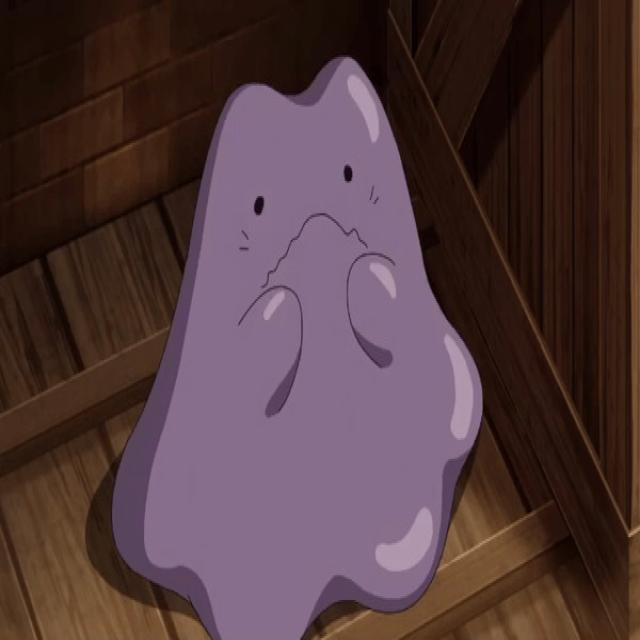

In [5]:
#@markdown ### 테스트 이미지 검사하기
#@markdown 테스트에 사용할 이미지를 정하고, 이미지에 문제가 없는지 확인해보는 코드입니다.\
#@markdown "/content/yolov5/test/images" 경로에 있는 jpg 파일 중 하나를 골라서,\
#@markdown 아래에 파일명을 입력해주세요.

import os
from PIL import Image

dir_path = '/content/yolov5/test/images'
target_img_name = "ditto8_jpg.rf.5d75e2f819a774962e16d24b4cd3be48.jpg" #@param {type: "string"}
target_img_path = os.path.join(dir_path, target_img_name)

img = Image.open(target_img_path)
display(img)

#@markdown 셀 하단에 이미지가 잘 출력된다면 성공입니다.

detect: weights=['yolov5s.pt'], source=/content/yolov5/test/images/ditto8_jpg.rf.5d75e2f819a774962e16d24b4cd3be48.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=untrained_exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-232-g1c60c53 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 84.4MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/test/images/ditto8_jpg.rf.5d75e2f819a774962e16d24b4cd3be48.jpg: 640x640 (no detections), 12.3ms
Speed: 0.6ms pre-process, 12.3ms inference, 21.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/det

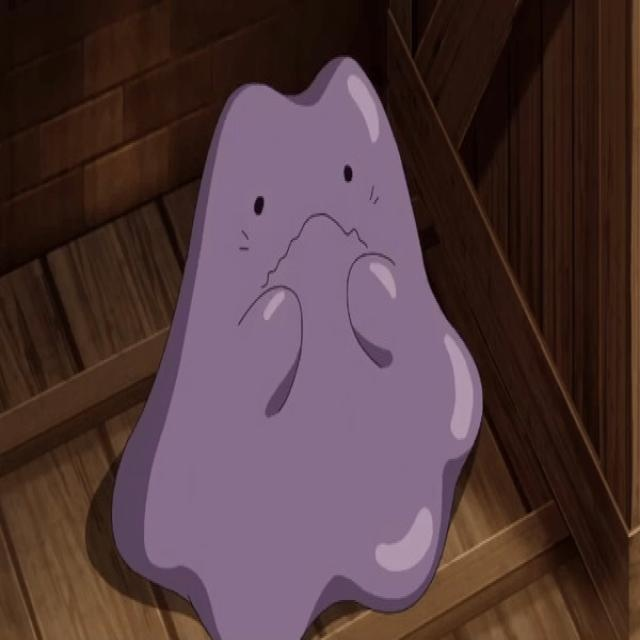

In [6]:
#@markdown ### 테스트 이미지 감지하기: 초기 모델
#@markdown 모델을 학습시키기 전 초기 상태에서, 테스트 이미지를 어떻게 감지하는지 확인해보는 코드입니다.\
#@markdown 이미지에 따라 감지될 수도, 감지되지 않을 수도 있습니다.\
#@markdown 셀 하단에 이미지가 출력되기만 하면 성공입니다.

!python detect.py --source {target_img_path} --weights yolov5s.pt --conf 0.25 --name untrained_exp --exist-ok

saved_dir = '/content/yolov5/runs/detect/untrained_exp'
img = Image.open(os.path.join(saved_dir, target_img_name))
display(img)

In [ ]:
#@markdown ### 모델 학습시키기
#@markdown 이제 모델을 학습시킵니다.\
#@markdown 앞에서 준비한 데이터셋과 데이터 리스트를 사용하게 됩니다.\
#@markdown 학습은 다소 시간이 소요될 수 있으며, 199번째 Epoch까지 수행되면 성공입니다.\
#@markdown \
#@markdown 결과창 최하단의 "Results saved to ..." 뒤에 명시된 경로가 바로 학습된 결과가 저장된 경로입니다.\
#@markdown 다음 단계에서 사용되기 때문에, 해당 경로를 복사해둡니다.

yaml_path = '/content/yolov5/data.yaml'

!python train.py --img 640 --batch 16 --epochs 200 --data {yaml_path} --weights yolov5s.pt

2023-11-02 10:46:07.661689: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 10:46:07.661751: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 10:46:07.661798: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, work

In [ ]:
#@markdown ### 테스트 이미지 감지하기: 학습된 모델
#@markdown 처음 사용했던 테스트 이미지를 가지고, 학습이 완료된 모델을 테스트해보는 코드입니다.\
#@markdown 바로 앞에서 복사한 경로를 아래 입력해주면 됩니다.

path_start = "/content/yolov5"
path_saved = "runs/train/exp" #@param {type: "string"}
path_end = "weights/best.pt"
best_param_path = os.path.join(path_start, path_saved, path_end)
test_datas_dir = '/content/yolov5/test/images/'

!python detect.py --source {test_datas_dir} --weights {best_param_path} --conf 0.25 --name trained_exp --exist-ok --save-conf

saved_dir = '/content/yolov5/runs/detect/trained_exp'
img = Image.open(os.path.join(saved_dir, target_img_name))
display(img)

#@markdown 셀 하단에 이미지가 출력되면 성공입니다.\
#@markdown 학습 후 테스트 이미지의 객체 감지에 어떤 변화가 생겼는지 확인해보면 됩니다.\
#@markdown 원하는 결과가 나오지 않았다면, 데이터를 늘리거나 augmentation을 늘리는 등 데이터셋을 수정해주는 것이 좋습니다.

## 4. 실제로 사용해보기

이제는 데이터셋에 존재하지 않는 라벨링되지 않은 실제 이미지를 사용해서,\
앞에서 학습시킨 모델에 넣어 Object Detection을 진행해보려고 합니다.

In [ ]:
#@markdown ### 사용할 이미지 업로드하기
#@markdown Object Detection을 진행할 이미지를 업로드합니다.\
#@markdown 동시에 여러 파일도 업로드 가능하니 실습해보고 싶은 이미지를 한꺼번에 올려주세요.\
#@markdown 실행 시 아래 실행창에 파일 선택 버튼이 나타납니다.\
#@markdown 업로드된 이미지는 "/content/yolov5" 경로에 저장됩니다.

from google.colab import files

%cd /content/yolov5
uploaded = files.upload()

In [ ]:
#@markdown ### Object Detection 적용해보기
#@markdown 방금 업로드한 파일의 이름을 입력해주세요.

target_img_name = 'multiple_ditto.jpeg' #@param {type: "string"}
!python detect.py --source {target_img_name} --weights {best_param_path} --conf 0.25 --name trained_exp --exist-ok --save-conf

saved_dir = '/content/yolov5/runs/detect/trained_exp'
img = Image.open(os.path.join(saved_dir, target_img_name))
display(img)

#@markdown 성공적으로 실행되면, 셀 하단에 감지 결과 이미지가 나타나게 됩니다.